In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import arviz as az
import pymc as pm
import pymc.sampling_jax
import warnings

warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")
pd.options.mode.chained_assignment = None

/Users/corrado/opt/anaconda3/envs/pymc_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 42
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")

In [3]:
mu = 175
sigma = 7
n = 30
n_samples = 1000

samples = np.stack([np.random.normal(loc=mu, scale=sigma, size=n) for i in range(n_samples)])
samples.shape

(1000, 30)

In [4]:
print(*samples[1, :])

168.69466124730286 167.61236870178902 182.49461291333245 167.00049934815536 181.08942873439366 175.53112012124643 179.79405090485665 182.62054947748163 165.71470383571705 172.70860294407512 179.7087121487716 170.00518759460635 177.66021959428647 168.91562776896106 169.25154550092245 184.18309183973034 173.32227257238137 169.49612614366853 171.41424206181682 179.36075603770377 171.29580331570034 160.51597310146016 177.4853929418608 165.38252721488965 178.24813502150687 182.6018975465424 169.24709352328296 174.23478102371936 166.7165111332087 159.26739306065562


In [5]:
xbar = samples.mean(axis=1)
print(*xbar[0:10])

175.6319947556266 173.05246291246755 175.0340927117732 174.7820073462706 173.40370428921156 175.9562816791775 175.7615792870604 172.3768224443081 174.27009236443712 178.7905958109046


In [6]:
alpha = 0.05
t = st.t.ppf(1 - alpha/2, n-1)
t

2.045229642132703

In [7]:
interval_width = t * samples.std(axis=1, ddof=1) / np.sqrt(n)
CI_low = samples.mean(axis=1) - interval_width
CI_high = samples.mean(axis=1) + interval_width

In [8]:
coverage_p = np.sum(np.logical_and(CI_low < mu, mu < CI_high)) / samples.shape[0]
coverage_p

0.961

In [9]:
sample_size = 20
mu = 50
sigma = 10
sample_data = np.random.normal(loc=mu, scale=sigma, size=n)
print(sample_data)

[43.92966908 44.27020104 49.99373919 40.35232357 50.50853786 56.22620204
 69.60193884 63.78420162 50.00098984 38.66698298 52.77272792 67.28468741
 50.06639604 41.97468943 40.055261   57.37302056 64.94683285 67.38839506
 58.06007148 61.23390007 55.41185684 62.26691059 55.85702144 53.44128557
 47.2848391  60.99622934 57.25007993 51.86186623 49.05777561 40.26167718]


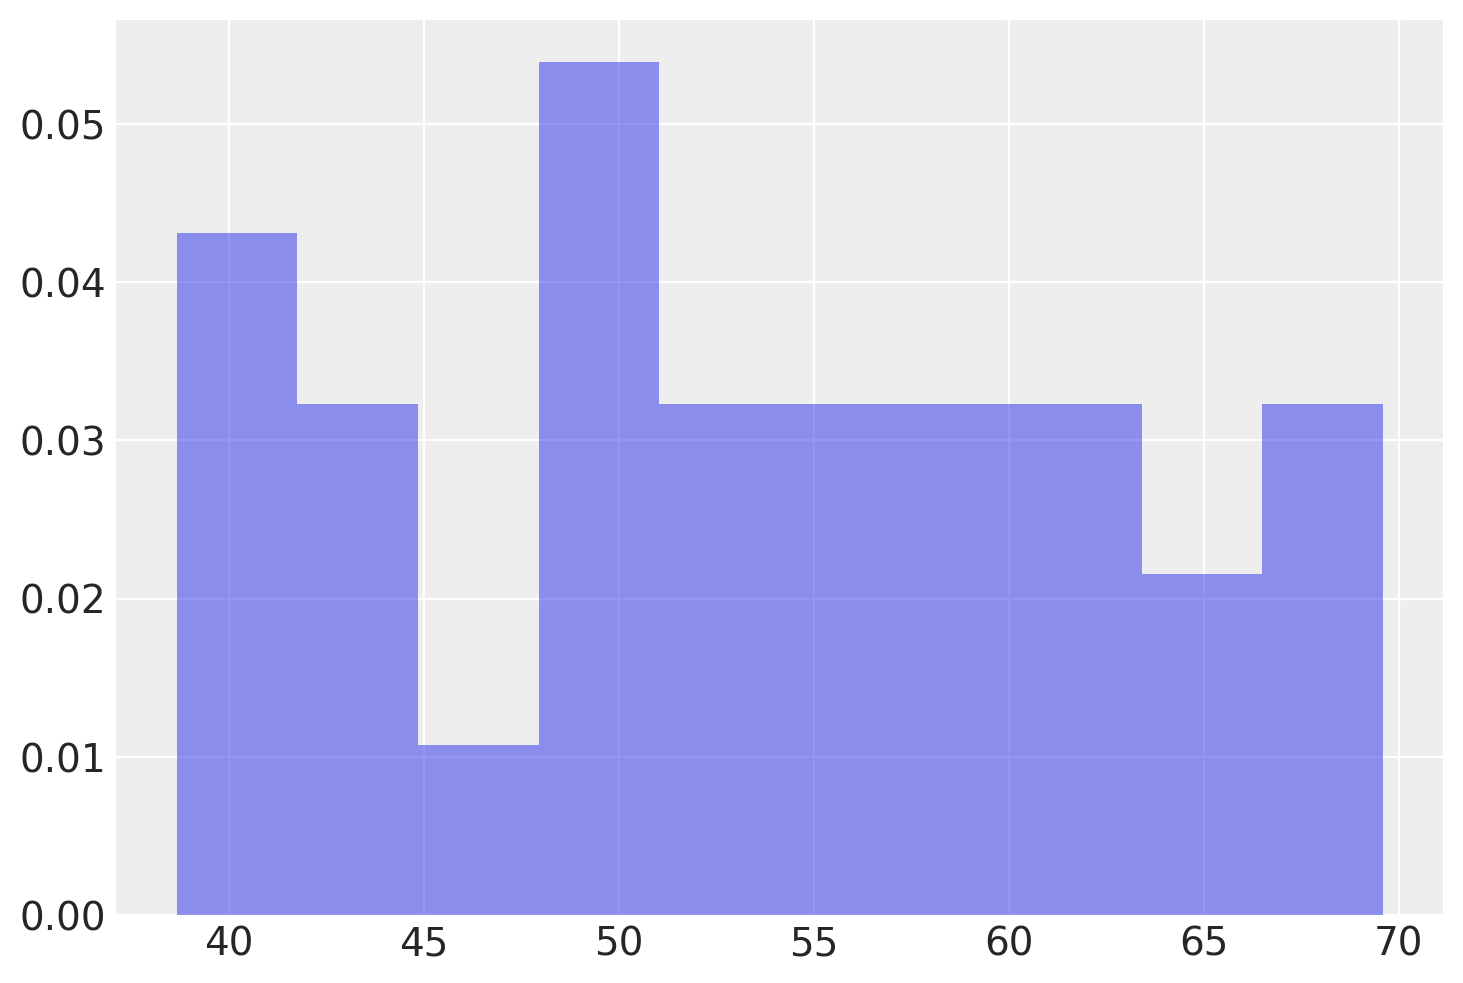

In [10]:
plt.hist(sample_data, density=True, alpha=0.5)
plt.show()

In [11]:
sample_mean = np.mean(sample_data)
sample_mean

53.40601032284557

In [12]:
sample_stddev = np.std(sample_data, ddof=1)
sample_stddev

8.912280023160477

In [13]:
standard_error = sample_stddev / np.sqrt(sample_size)
print(standard_error)

1.9928463966300225


In [14]:
degrees_of_freedom = sample_size - 1
t_val = st.t.ppf(0.975, degrees_of_freedom)
print(t_val)

2.093024054408263


In [15]:
margin_of_error = t_val * standard_error
print(margin_of_error)

4.171075444887467


In [16]:
confidence_interval_lower = sample_mean - margin_of_error
confidence_interval_upper = sample_mean + margin_of_error
confidence_interval = [confidence_interval_lower, confidence_interval_upper]
print(confidence_interval)

[49.234934877958096, 57.57708576773304]


In [17]:
def visualize_output(sample_data, sample_mean, interval, type_interval):
    plt.hist(sample_data, density=True, alpha=0.5)
    plt.axvline(x=sample_mean, color='r', linestyle='dashed', linewidth=2)
    plt.axvline(x=interval[0], color='g', linewidth=2)
    plt.axvline(x=interval[1], color='g', linewidth=2)
    plt.legend(['Sample Mean', f'{type_interval} interval'])

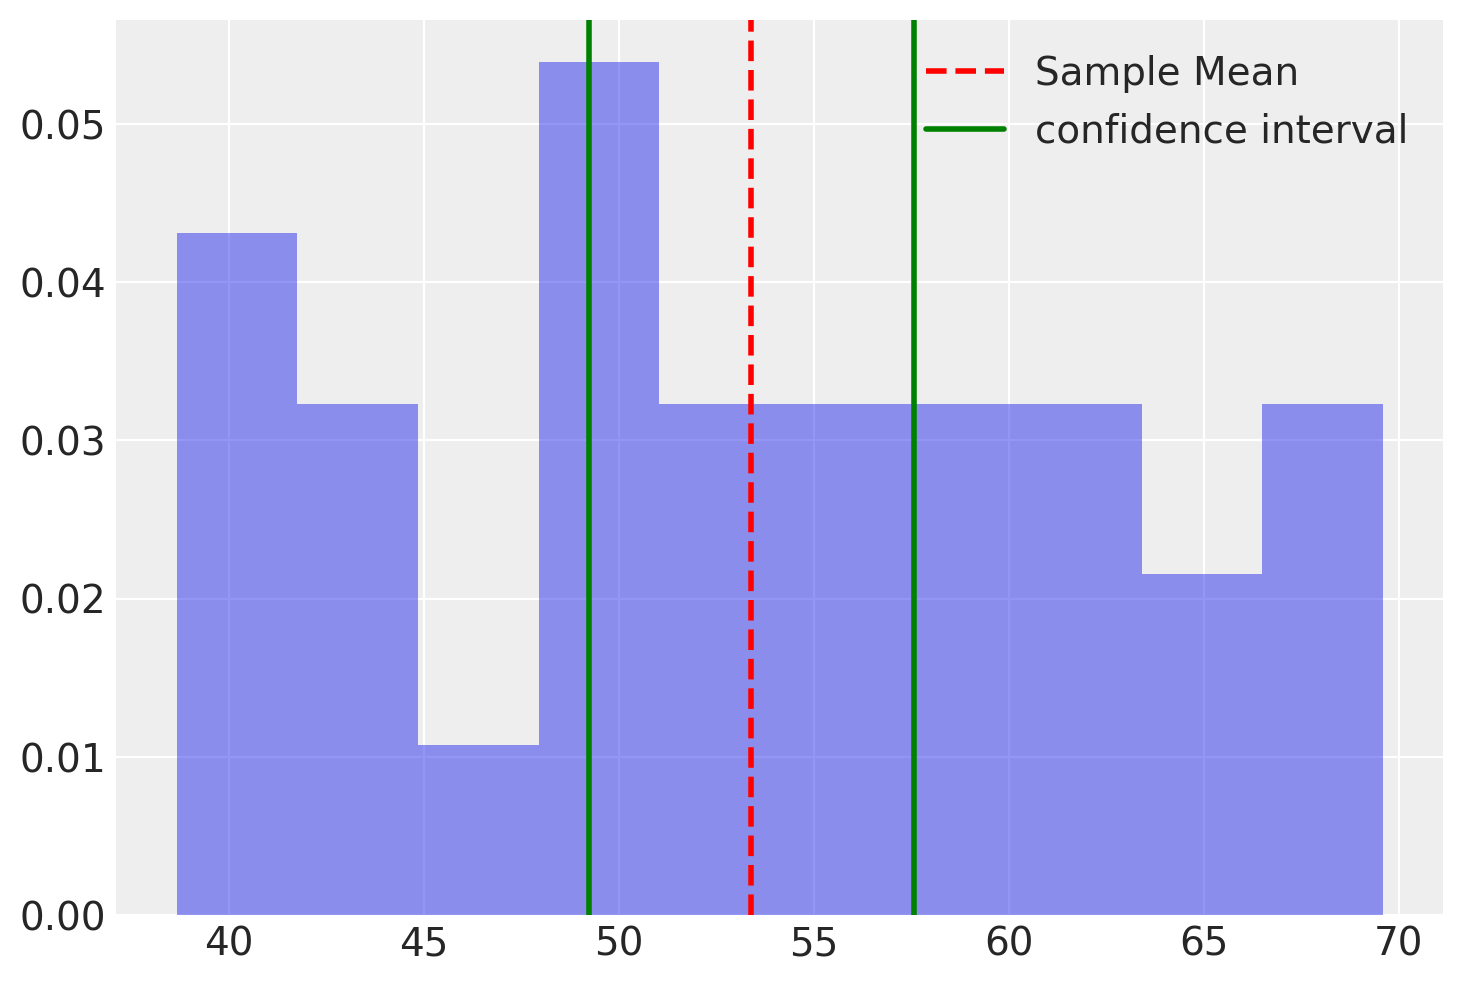

In [18]:
visualize_output(sample_data, sample_mean, confidence_interval, 'confidence')

In [19]:
model = pm.Model()

with model:
    mu = pm.Normal("mu", mu=sample_mean, sigma=20)
    sigma = pm.HalfNormal("sigma", 20)
    Y_obs = pm.Normal("Y_obs", mu=mu, sigma=sigma, observed=sample_data)

In [20]:
with model:
    idata = pm.sampling_jax.sample_numpyro_nuts()

Compiling...


Compilation time = 0:00:00.656579


Sampling...


  0%|                                                                                 | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                   | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                 | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                   | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                 | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                   | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                 | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                   | 0/2000 [00:00<?, ?it/s]

Running chain 2:   0%|                                                                | 0/2000 [00:01<?, ?it/s]

Running chain 0:   0%|                                                                | 0/2000 [00:01<?, ?it/s]

Running chain 3:   0%|                                                                | 0/2000 [00:01<?, ?it/s]

Running chain 1:   0%|                                                                | 0/2000 [00:01<?, ?it/s]

Running chain 0: 100%|███████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1418.45it/s]


Running chain 1: 100%|███████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1419.73it/s]


Running chain 2: 100%|███████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1421.39it/s]


Running chain 3: 100%|███████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1423.24it/s]


Sampling time = 0:00:01.633110


Transforming variables...


Transformation time = 0:00:00.066173


In [21]:
az.summary(idata, hdi_prob=0.95, round_to=2)

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu,53.42,1.70,50.20,56.74,0.03,0.02,3025.05,2467.41,1.0
sigma,9.31,1.31,6.88,11.88,0.03,0.02,2707.57,2295.94,1.0


In [22]:
%load_ext watermark
%watermark -n -u -v -iv -w 

Last updated: Wed Nov 15 2023

Python implementation: CPython
Python version       : 3.11.6
IPython version      : 8.17.2

matplotlib: 3.8.1
pandas    : 2.1.3
scipy     : 1.11.3
pymc      : 5.9.2
numpy     : 1.25.2
arviz     : 0.16.1

Watermark: 2.4.3

